# Building the transit accessibility network for Rome
### based on this example script: https://github.com/UDST/urbanaccess/blob/master/demo/simple_example.ipynb

In [1]:
import matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import time

import urbanaccess as ua
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network

from shapely.geometry import Point, LineString
import geopandas as gpd

%matplotlib inline

## Download GTFS Data

In [2]:
GTFS_LOC='https://dati.comune.roma.it/catalog/dataset/a7dadb4a-66ae-4eff-8ded-a102064702ba/resource/266d82e1-ba53-4510-8a81-370880c4678f/download/rome_static_gtfs_test.zip'

In [3]:
# settings.to_dict()

In [4]:
settings.log_console = True
settings.log_file = False

In [5]:
feeds.add_feed(add_dict={'roma': GTFS_LOC})

Added 1 feeds to gtfs_feeds: {'roma': 'https://dati.comune.roma.it/catalog/dataset/a7dadb4a-66ae-4eff-8ded-a102064702ba/resource/266d82e1-ba53-4510-8a81-370880c4678f/download/rome_static_gtfs_test.zip'}


In [6]:
# feeds.to_dict()

In [7]:
gtfsfeeds.download()

1 GTFS feed(s) will be downloaded here: data/gtfsfeed_zips
roma GTFS feed downloaded successfully. Took 11.95 seconds for 41,588,664.0KB
GTFS feed download completed. Took 11.95 seconds
roma.zip successfully extracted to: data/gtfsfeed_text/roma
GTFS feed zipfile extraction completed. Took 0.89 seconds for 1 files


In [8]:
validation = True
verbose = True
# bbox for Rome
41.986079, 12.369733
41.793235, 12.620193
bbox = (12.369733,41.793235,12.620193,41.986079)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
GTFS text file header whitespace check completed. Took 0.71 seconds
--------------------------------
Processing GTFS feed: roma
GTFS feed: roma, calendar_dates uses the same service_id across multiple agency_ids. This feed calendar_dates table will be modified from its original format to provide service_ids for each agency using a one to many join
GTFS feed: roma, calendar uses the same service_id across multiple agency_ids. This feed calendar table will be modified from its original format to provide service_ids for each agency using a one to many join
GTFS feed: roma, stops uses the same stop_id across multiple agency_ids. This feed stops table will be modified from its original format to provide stop_ids for each agency using a one to many join
agency.txt agency_name column has more than one agency name listed. Unique agency id was assigned using the agency id and associated agency

In [24]:
# loaded_feeds.stops.head()
# loaded_feeds.routes.head()
# loaded_feeds.stop_times.head()
# loaded_feeds.trips.head()
loaded_feeds.calendar.head()

service_id unique_agency_id  monday  tuesday  wednesday  thursday  friday  \
0         44         roma_tpl       0        0          0         1       0   
1        260         roma_tpl       1        1          1         1       1   
2        225         roma_tpl       1        1          1         1       1   
3        224         roma_tpl       1        1          1         1       1   
4        227         roma_tpl       1        1          1         1       1   

   saturday  sunday  start_date  end_date unique_feed_id  
0         0       0    20211223  20211223         roma_1  
1         1       1    20211215  20220126         roma_1  
2         1       1    20211216  20220126         roma_1  
3         1       1    20211219  20220123         roma_1  
4         1       1    20211216  20220126         roma_1

## Create the transit network object

In [26]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='monday',
                                   timerange=['07:00:00', '10:00:00'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
157 service_ids were extracted from calendar
16,036 trip(s) 10.63 percent of 150,828 total trip records were found in calendar for GTFS feed(s): ['roma']
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
16,036 of 150,828 total trips were extracted representing calendar day: monday. Took 0.12 seconds
There are no departure time records missing from trips following the specified schedule. There are no records to interpolate.
Difference between stop times has been successfully calculated. Took 1.11 seconds
Stop times from 07:00:00 to 10:00:00 successfully

Successfully created transit network. Took 9.36 seconds


In [27]:
urbanaccess_net = ua.network.ua_network

In [28]:
urbanaccess_net.transit_edges.head()
# urbanaccess_net.transit_nodes.head()

node_id_from         node_id_to    weight unique_agency_id  \
0  ROME7711_roma_tpl     75495_roma_tpl  1.450000         roma_tpl   
1     75495_roma_tpl     75496_roma_tpl  1.183333         roma_tpl   
2     75496_roma_tpl     75497_roma_tpl  0.700000         roma_tpl   
3     75497_roma_tpl     75498_roma_tpl  2.600000         roma_tpl   
4     75498_roma_tpl  ROME4195_roma_tpl  1.550000         roma_tpl   

                                      unique_trip_id  sequence  \
0  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...         1   
1  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...         2   
2  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...         3   
3  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...         4   
4  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...         5   

                                                  id  route_type  \
0  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...           3   
1  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...           3   
2  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...           3   
3  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...           3   
4  VJ0001a077e15a77a24b2083fc86b83476156c3e3d_rom...           3   

  unique_route_id net_type  
0    281_roma_tpl  transit  
1    281_roma_tpl  transit  
2    281_roma_tpl  transit  
3    281_roma_tpl  transit  
4    281_roma_tpl  transit

<AxesSubplot:xlabel='x', ylabel='y'>

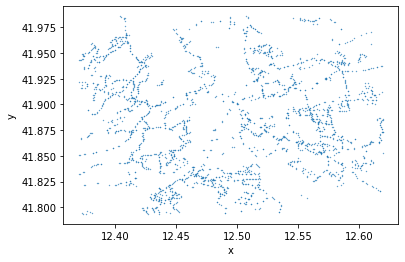

In [29]:
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

In [ ]:
### Add headways to account for waiting times

In [34]:
ua.gtfs.headways.headways(gtfsfeeds_df=loaded_feeds,
                          headway_timerange=['07:00:00','10:00:00'])

Stop times from 07:00:00 to 10:00:00 successfully selected 65,766 records out of 355,493 total records (18.50 percent of total). Took 0.06 seconds
Starting route stop headway calculation for 3,554 route stops...
Route stop headway calculation complete. Took 2.91 seconds
headway calculation complete. Took 3.45 seconds


In [35]:
loaded_feeds.headways.head()

count      mean       std  min  25%  50%  75%   max  unique_stop_id  \
2142   26.0  6.811538  4.398575  1.1  4.0  5.9  7.1  17.1  04975_roma_tpl   
2148   26.0  6.811538  4.398575  1.1  4.0  5.9  7.1  17.1  04975_roma_tpl   
2338   26.0  6.811538  4.398575  1.1  4.0  5.9  7.1  17.1  04975_roma_tpl   
3721   26.0  6.811538  4.398575  1.1  4.0  5.9  7.1  17.1  04975_roma_tpl   
3727   26.0  6.811538  4.398575  1.1  4.0  5.9  7.1  17.1  04975_roma_tpl   

     unique_route_id                 node_id_route  
2142   1916_roma_tpl  04975_roma_tpl_1916_roma_tpl  
2148   1916_roma_tpl  04975_roma_tpl_1916_roma_tpl  
2338   1916_roma_tpl  04975_roma_tpl_1916_roma_tpl  
3721   1916_roma_tpl  04975_roma_tpl_1916_roma_tpl  
3727   1916_roma_tpl  04975_roma_tpl_1916_roma_tpl

## Download OSM Data for pedestrian network

In [30]:
nodes, edges = ua.osm.load.ua_network_from_bbox(bbox=bbox,
                                                remove_lcn=True)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](41.79323500,12.36973300,41.98607900,12.62019300);>;);out;'}"
Downloaded 51,514.5KB from www.overpass-api.de in 9.22 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 9.95 seconds
Returning OSM data with 364,209 nodes and 69,536 ways...
Edge node pairs completed. Took 32.79 seconds
Returning processed graph with 80,898 nodes and 230,384 edges...
Completed OSM data download and Pandana node and edge table creation in 45.94 seconds
checking for low connectivity nodes...
Generating contraction hierarchies with 8 threads.
Setting CH node vector of size 80898
Setting CH edge vector of size 239436
Range graph removed 252930 edges of 478872
. 10% . 20

In [31]:
ua.osm.network.create_osm_net(osm_edges=edges,
                              osm_nodes=nodes,
                              travel_speed_mph=3)

Created OSM network with travel time impedance using a travel speed of 3 MPH. Took 0.00 seconds


In [32]:
# urbanaccess_net.osm_nodes.head()
urbanaccess_net.osm_edges.head()

from          to   distance  \
1233461524 1420310674  1233461524  1420310674  21.545766   
1420310674 1233461524  1420310674  1233461524  21.545766   
25388118   1419037363    25388118  1419037363  14.166879   
1419037363 25388118    1419037363    25388118  14.166879   
           309567645   1419037363   309567645  14.725033   

                                             name  ref   highway service  \
1233461524 1420310674  Corso Vittorio Emanuele II  NaN  tertiary     NaN   
1420310674 1233461524  Corso Vittorio Emanuele II  NaN  tertiary     NaN   
25388118   1419037363  Lungotevere degli Altoviti  NaN   primary     NaN   
1419037363 25388118    Lungotevere degli Altoviti  NaN   primary     NaN   
           309567645   Lungotevere degli Altoviti  NaN   primary     NaN   

                      bridge tunnel access oneway toll lanes maxspeed  hgv  \
1233461524 1420310674    NaN    NaN    NaN    yes  NaN     2       50  NaN   
1420310674 1233461524    NaN    NaN    NaN    yes  NaN     2       50  NaN   
25388118   1419037363    NaN    NaN    NaN    yes  NaN     3       50  NaN   
1419037363 25388118      NaN    NaN    NaN    yes  NaN     3       50  NaN   
           309567645     NaN    NaN    NaN    yes  NaN     3       50  NaN   

                      area width junction    weight net_type  
1233461524 1420310674  NaN   NaN      NaN  0.267759     walk  
1420310674 1233461524  NaN   NaN      NaN  0.267759     walk  
25388118   1419037363  NaN   NaN      NaN  0.176058     walk  
1419037363 25388118    NaN   NaN      NaN  0.176058     walk  
           309567645   NaN   NaN      NaN  0.182995     walk

<AxesSubplot:xlabel='x', ylabel='y'>

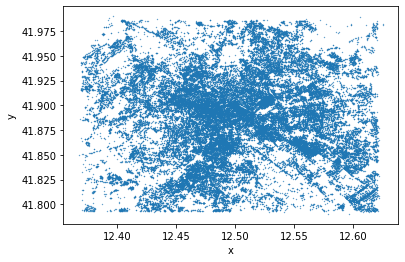

In [33]:
urbanaccess_net.osm_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

## Create integrated transit and pedestrian network

In [36]:
ua.network.integrate_network(urbanaccess_network=urbanaccess_net,
                             headways=True,
                             urbanaccess_gtfsfeeds_df=loaded_feeds,
                             headway_statistic='mean')

Loaded UrbanAccess network components comprised of:
     Transit: 2,686 nodes and 62,653 edges;
     OSM: 80,336 nodes and 229,102 edges
routes successfully joined to transit nodes. Took 0.08 seconds
Connector edges between the OSM and transit network nodes successfully completed. Took 0.81 seconds
mean route stop headway will be used for pedestrian to transit edge impedance.
Headway impedance calculation completed. Took 0.02 seconds
Edge and node tables formatted for Pandana with integer node ids: id_int, to_int, and from_int. Took 2.64 seconds


Network edge and node network integration completed successfully resulting in a total of 83,889 nodes and 361,053 edges:
     Transit: 3,553 nodes 62,653 edges;
     OSM: 80,336 nodes 229,102 edges; and
     OSM/Transit connector: 69,298 edges.


## Plot by edge network type

In [55]:
27,158,119
217,95,2
117,112,179
231,41,138
102,166,30

type_to_color={'osm to transit': (27/255,158/255,119/255, 1.0),
              'transit': (217/255,95/255,2/255,1.0),
              'osm': (117/255,112/255,179/255,1.0),
              'transit to osm': (231/255,41/255,138/255,1.0),
              'walk': (102/255,166/255,30/255,1.0)}
edgecolor_type=urbanaccess_net.net_edges.apply(
    lambda row:type_to_color[row['net_type']], axis=1)

Figure created. Took 14.79 seconds


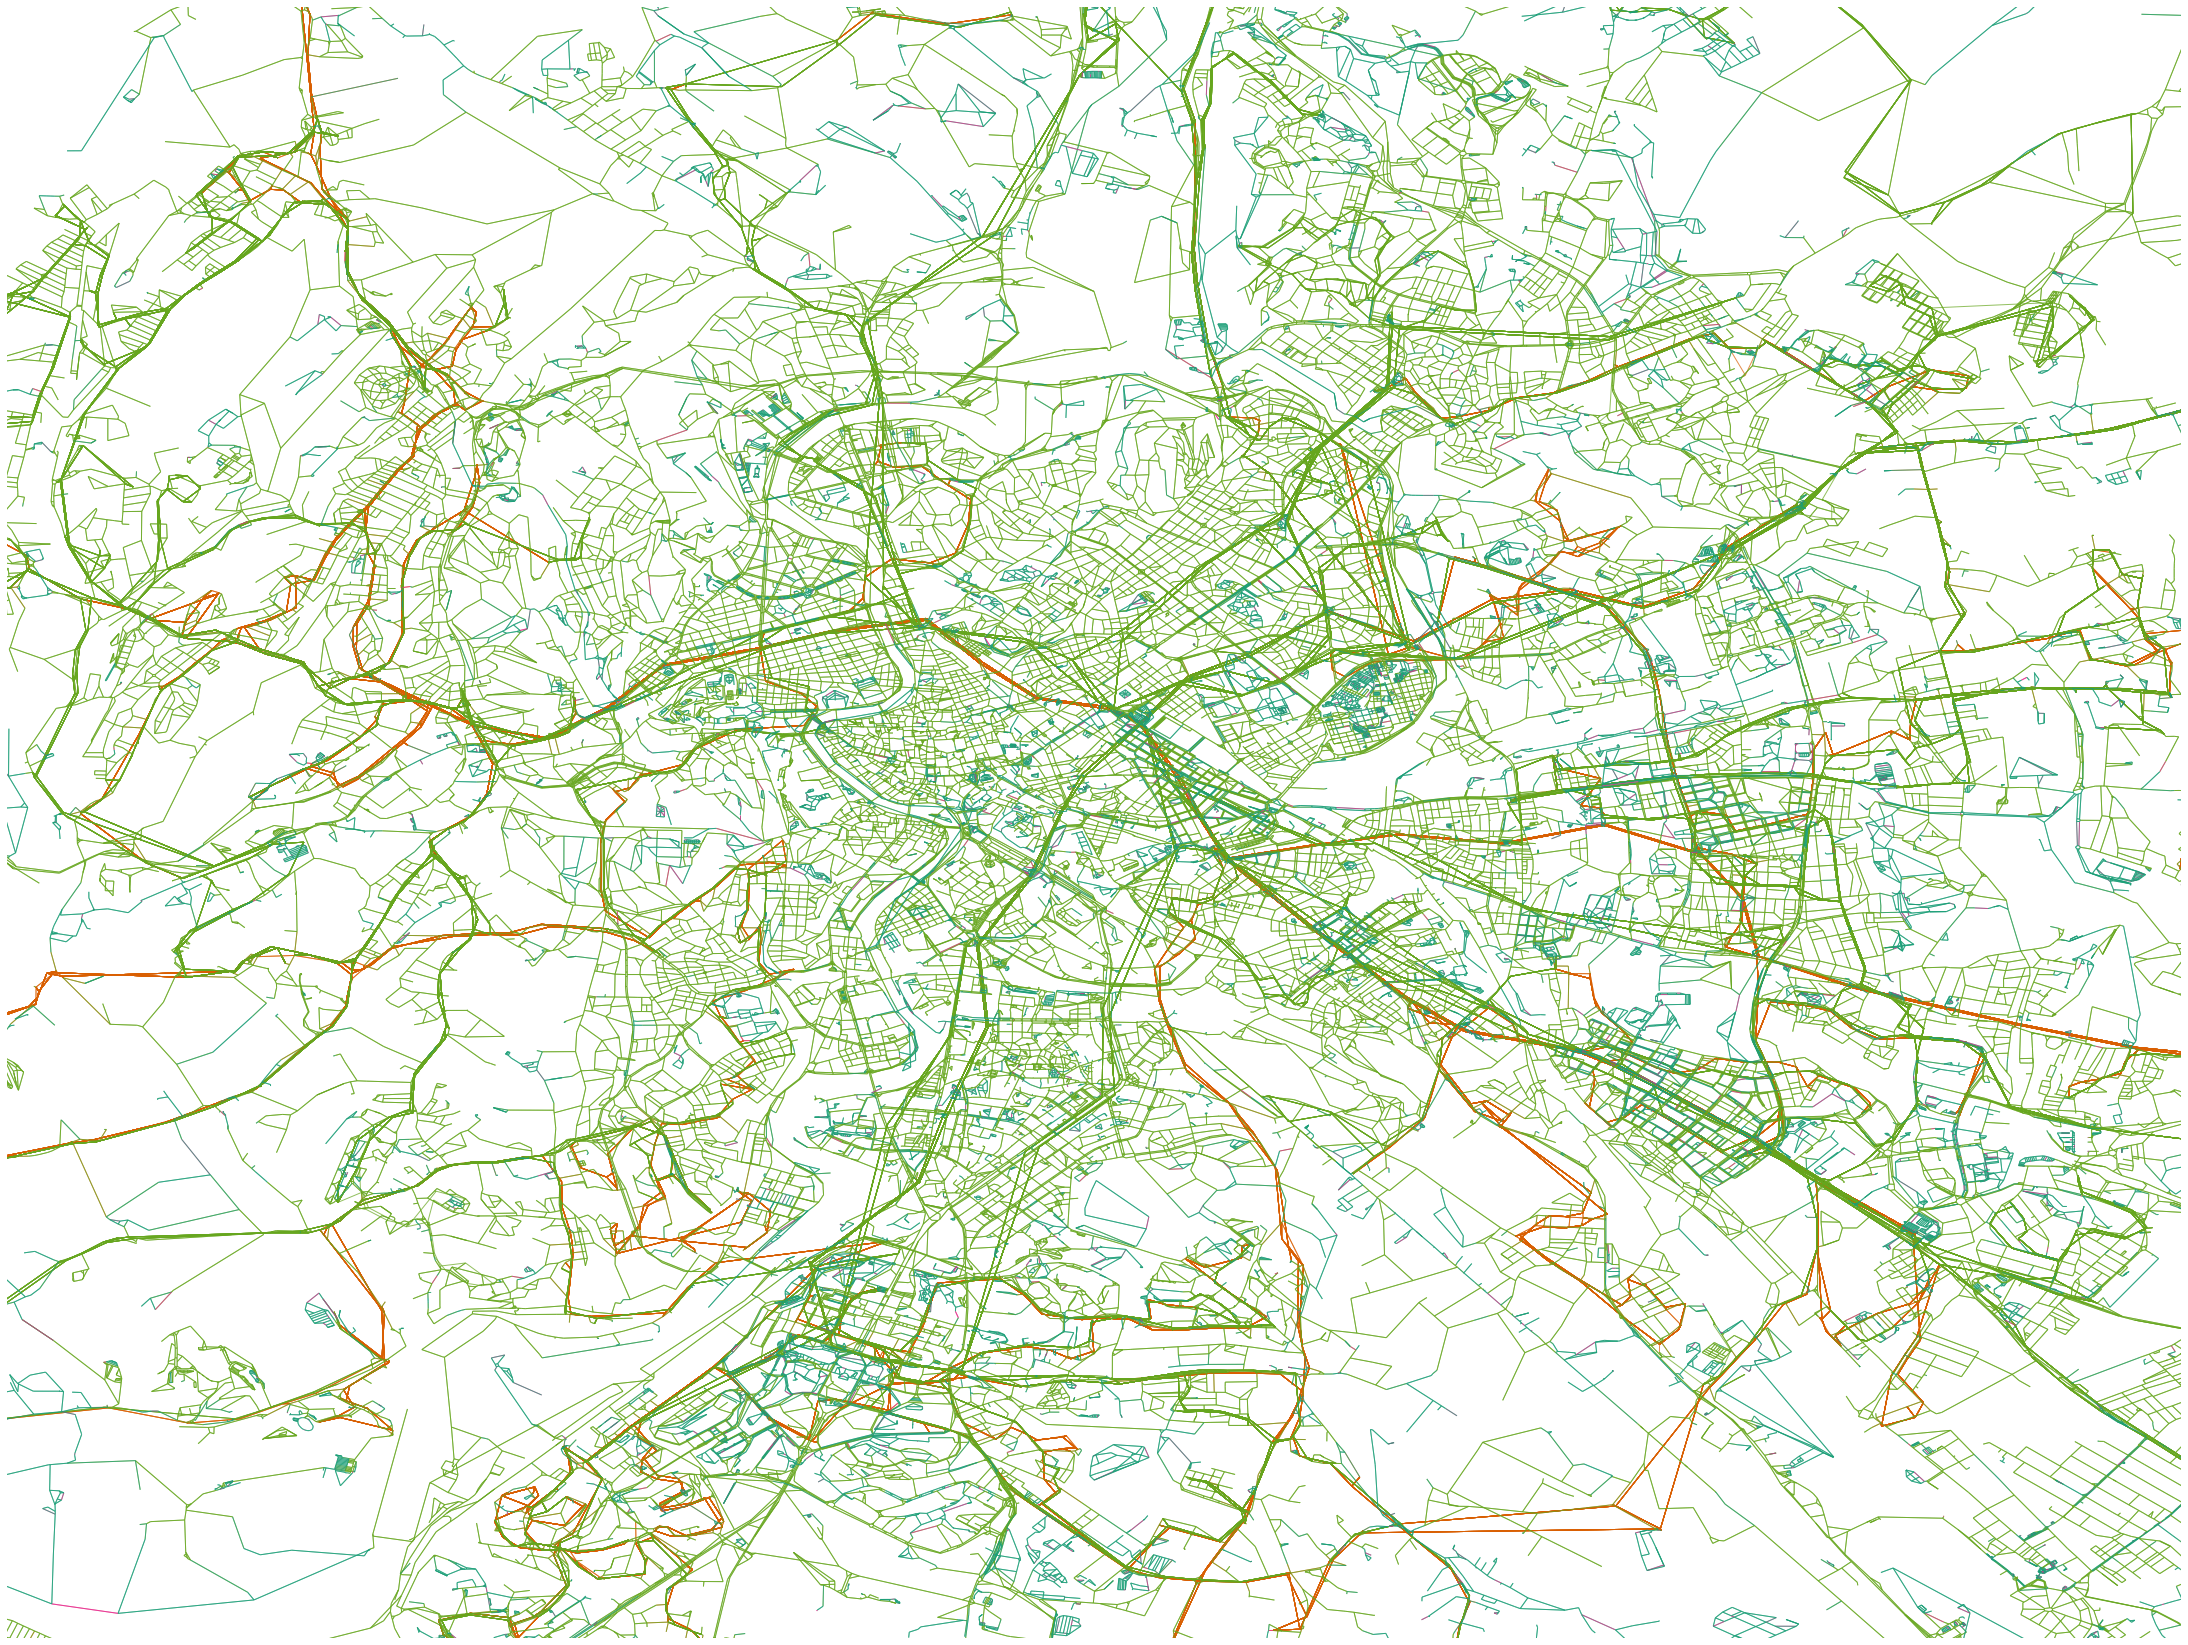

(<Figure size 2805.34x2160 with 1 Axes>, <AxesSubplot:>)

In [56]:
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor_type, edge_linewidth=1, edge_alpha=0.7,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

## Plot by edge weight

Figure created. Took 13.63 seconds


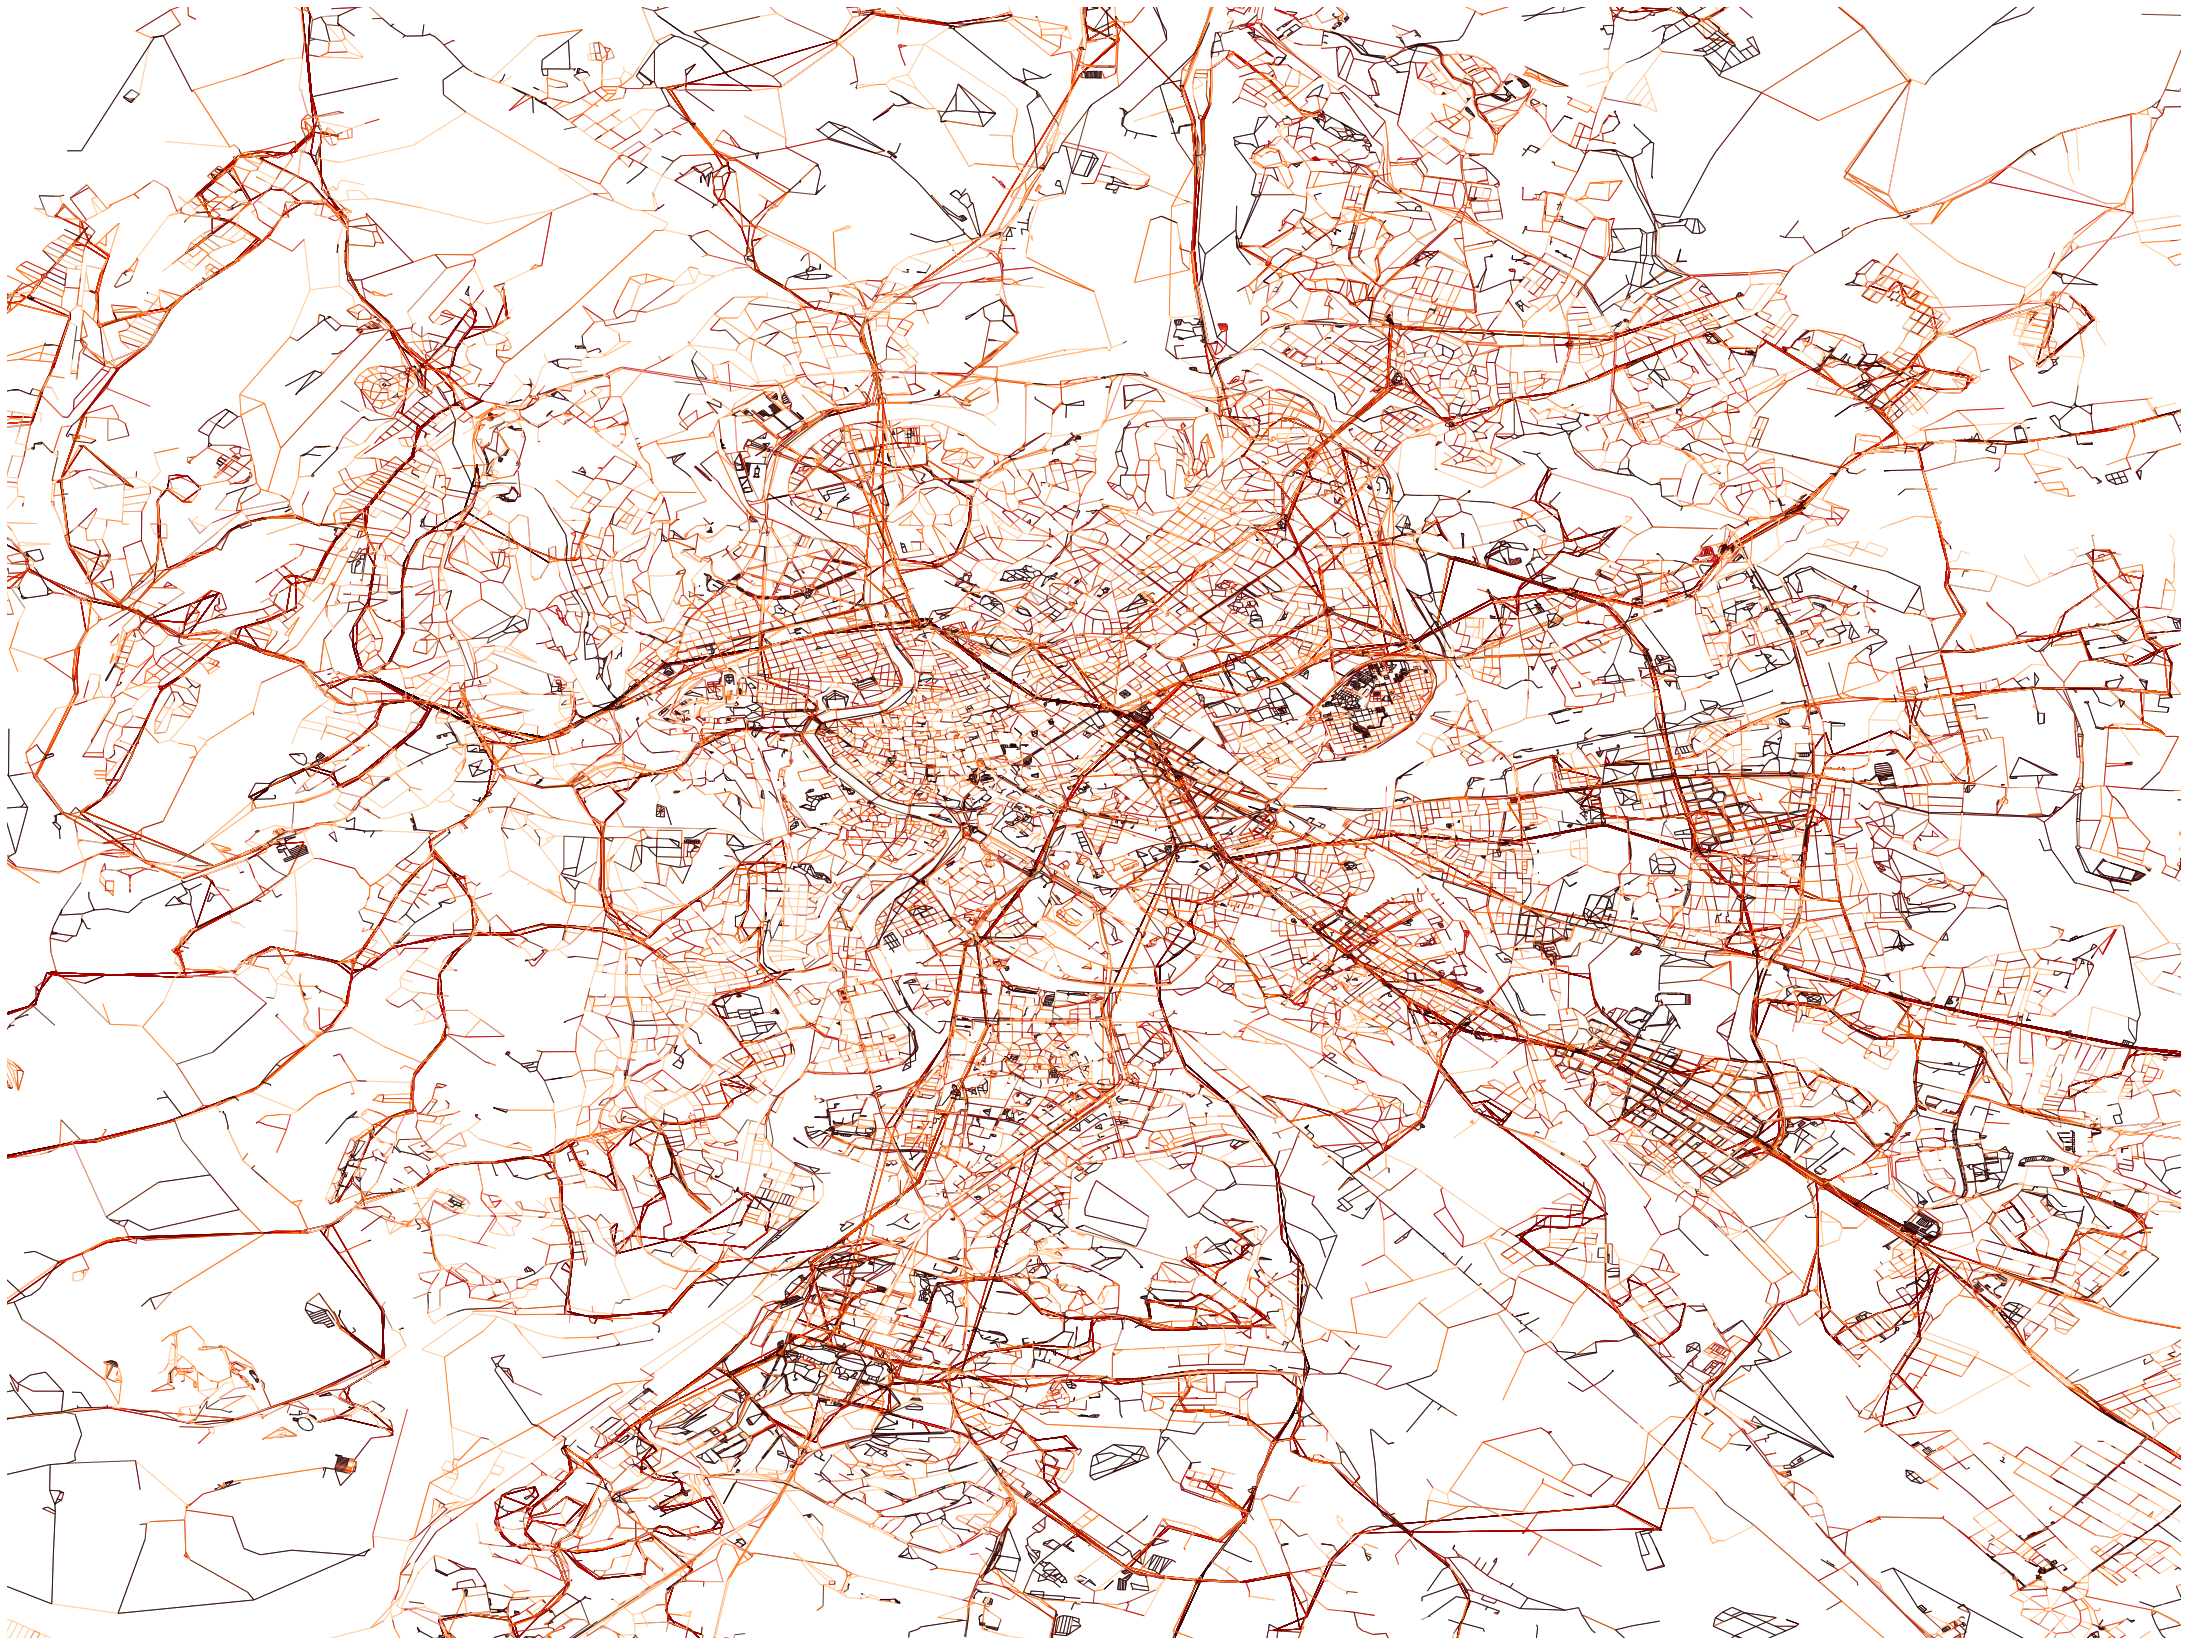

(<Figure size 2805.34x2160 with 1 Axes>, <AxesSubplot:>)

In [37]:
edgecolor_weight = ua.plot.col_colors(df=urbanaccess_net.net_edges, col='weight', cmap='gist_heat_r', num_bins=5)
ua.plot.plot_net(nodes=urbanaccess_net.net_nodes,
                 edges=urbanaccess_net.net_edges,
                 bbox=bbox,
                 fig_height=30, margin=0.02,
                 edge_color=edgecolor_weight, edge_linewidth=1, edge_alpha=0.7,
                 node_color='black', node_size=0, node_alpha=1, node_edgecolor='none', node_zorder=3, nodes_only=False)

## Save the network data

In [43]:
urbanaccess_net.net_nodes.to_csv('./outputs/networks/nodes.csv')
urbanaccess_net.net_edges.to_csv('./outputs/networks/edges.csv')

# Save a geojson file of the network edges

In [58]:
edges=urbanaccess_net.net_edges
nodes=urbanaccess_net.net_nodes

In [61]:
edges=edges.merge(urbanaccess_net.net_nodes[['x', 'y']],
                 left_on='from_int', right_index=True
                 ).rename(columns={'x': 'from_x', 'y': 'from_y'})

In [63]:
edges=edges.merge(urbanaccess_net.net_nodes[['x', 'y']],
                 left_on='to_int', right_index=True
                 ).rename(columns={'x': 'to_x', 'y': 'to_y'})

In [74]:
edges['geometry']=edges.apply(lambda row:
                               LineString([[row['from_x'], row['from_y']], 
                                           [row['to_x'], row['to_y']]]), axis=1)

In [75]:
edges_gdf=gpd.GeoDataFrame(edges, geometry='geometry')

<AxesSubplot:>

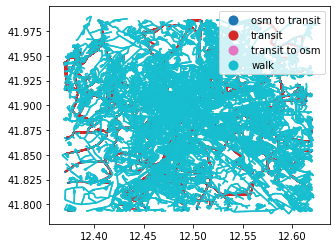

In [76]:
edges_gdf.plot(column='net_type', legend=True)

In [77]:
edges_gdf[['net_type','weight', 'geometry']].to_file('./outputs/networks/edges.geojson')